In [1]:
import numpy as np
import pandas as pd

# 종속변수 = 점수
# 독립변수 1, 2 = 성별, 수업방식

df = pd.DataFrame({
    'score': [88, 92, 95, 89, 90, 91, 85, 87, 86, 90, 93, 94],
    'gender': ['M', 'M', 'M', 'M', 'F', 'F', 'F', 'F', 'M', 'M', 'F', 'F'],
    'method': ['online', 'online', 'offline', 'offline', 'online', 'online', 'offline', 'offline',
               'online', 'offline', 'online', 'offline']
})

df.head()

,score,gender,method
0,88,M,online
1,92,M,online
2,95,M,offline
3,89,M,offline
4,90,F,online


In [13]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# 모수 검정 (parametric test)
# 목적 : 두 개의 독립 변수(요인)가 종속 변수에 미치는 주효과 또는 상호작용 효과를 평가
# 가정 : 각 그룹은 정규분포를 따르고 분산이 같으며(등분산성) 독립된 표본이어야 한다.
# H₀ (귀무가설) : 두 독립변수의 교호작용 효과가 존재하지 않는다.
# H₁ (대립가설) : 두 독립변수의 교호작용 효과가 존재한다.

model = ols('score ~ gender + method + gender:method', data=df).fit()
anova_results = anova_lm(model)

anova_results

,df,sum_sq,mean_sq,F,PR(>F)
gender,1.0,4.543839e-28,4.543839e-28,4.099704e-29,1.000000
method,1.0,2.999644e-28,2.999644e-28,2.706445e-29,1.000000
gender:method,1.0,2.133333e+01,2.133333e+01,1.924812e+00,0.202751
Residual,8.0,8.866667e+01,1.108333e+01,NaN,NaN


In [14]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('score ~ gender * method', data=df).fit()
anova_results = anova_lm(model)

anova_results

,df,sum_sq,mean_sq,F,PR(>F)
gender,1.0,4.543839e-28,4.543839e-28,4.099704e-29,1.000000
method,1.0,2.999644e-28,2.999644e-28,2.706445e-29,1.000000
gender:method,1.0,2.133333e+01,2.133333e+01,1.924812e+00,0.202751
Residual,8.0,8.866667e+01,1.108333e+01,NaN,NaN


In [15]:
from scipy.stats import f_oneway

# 1) gender 그룹별 점수 리스트 만들기
scores_M = df[df['gender'] == 'M']['score']
scores_F = df[df['gender'] == 'F']['score']

# gender에 따른 f_oneway
f_stat_gender, p_val_gender = f_oneway(scores_M, scores_F)
print(f"Gender effect: F={f_stat_gender:.3f}, p={p_val_gender:.3f}")

# 2) method 그룹별 점수 리스트 만들기
scores_online = df[df['method'] == 'online']['score']
scores_offline = df[df['method'] == 'offline']['score']

# method에 따른 f_oneway
f_stat_method, p_val_method = f_oneway(scores_online, scores_offline)
print(f"Method effect: F={f_stat_method:.3f}, p={p_val_method:.3f}")

Gender effect: F=0.000, p=1.000
Method effect: F=0.000, p=1.000


In [8]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# 🎲 샘플 데이터 생성
data = pd.DataFrame({
    'score': [88, 92, 95, 89, 90, 91, 85, 87, 86, 90, 93, 94],
    'gender': ['M', 'M', 'M', 'M', 'F', 'F', 'F', 'F', 'M', 'M', 'F', 'F'],
    'method': ['online', 'online', 'offline', 'offline', 'online', 'online', 'offline', 'offline',
               'online', 'offline', 'online', 'offline']
})

# 📈 모델 적합
model = ols('score ~ C(gender) + C(method) + C(gender):C(method)', data=data).fit()

# 🔍 이원분산분석 수행
anova_results = anova_lm(model, typ=1)
print(anova_results)

# 이원분산분석 데이터 수 df의 합 + 1

                      df        sum_sq       mean_sq             F    PR(>F)
C(gender)            1.0  4.543839e-28  4.543839e-28  4.099704e-29  1.000000
C(method)            1.0  2.999644e-28  2.999644e-28  2.706445e-29  1.000000
C(gender):C(method)  1.0  2.133333e+01  2.133333e+01  1.924812e+00  0.202751
Residual             8.0  8.866667e+01  1.108333e+01           NaN       NaN


In [ ]:
# 교호작용

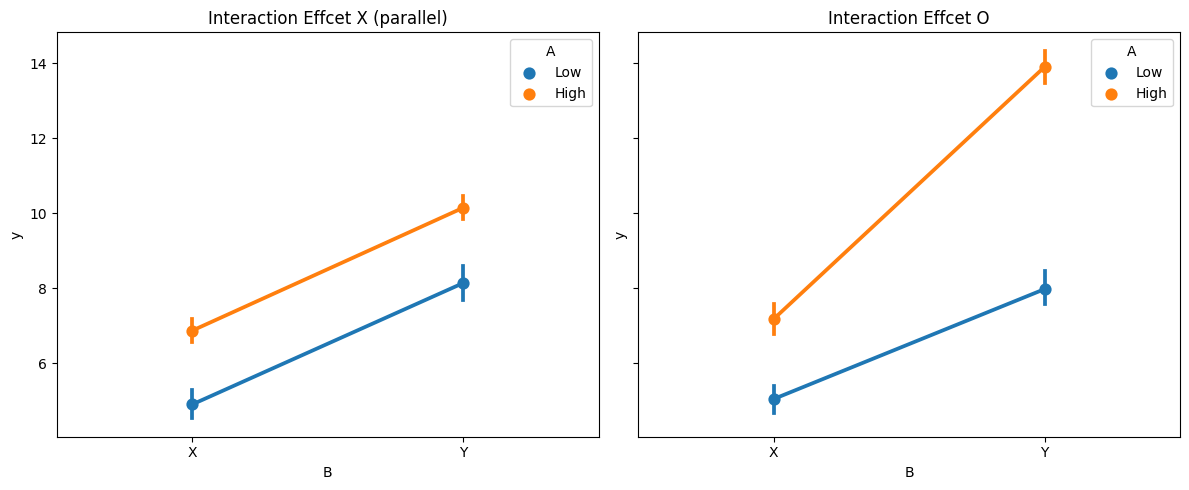

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# 데이터 생성
np.random.seed(42)
n = 100
A = np.random.choice(['Low', 'High'], size=n)
B = np.random.choice(['X', 'Y'], size=n)

# 교호작용이 없는 경우 (평행한 효과)
y_no_interaction = (
    5 +
    (A == 'High') * 2 +     # A 효과
    (B == 'Y') * 3 +        # B 효과
    np.random.normal(0, 1, size=n)
)

# 교호작용이 있는 경우 (비평행)
y_interaction = (
    5 +
    (A == 'High') * 2 +
    (B == 'Y') * 3 +
    (A == 'High') * (B == 'Y') * 4 +  # interaction 효과
    np.random.normal(0, 1, size=n)
)

# 데이터프레임 생성
df_no_interaction = pd.DataFrame({'A': A, 'B': B, 'y': y_no_interaction})
df_interaction = pd.DataFrame({'A': A, 'B': B, 'y': y_interaction})

# 교호작용 플롯
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.pointplot(x='B', y='y', hue='A', data=df_no_interaction, ax=axes[0])
axes[0].set_title('Interaction Effcet X (parallel)')

sns.pointplot(x='B', y='y', hue='A', data=df_interaction, ax=axes[1])
axes[1].set_title('Interaction Effcet O')

plt.tight_layout()
plt.show()

In [ ]:
교호작용에서의 P-value 의미 정리
귀무가설 (H₀): 교호작용 효과가 없다.
→ 두 요인의 결합 효과는 단순히 개별 효과의 합이다 (선형적, 플롯이 평행함).

대립가설 (H₁): 교호작용 효과가 있다.
→ 두 요인의 조합에 따라 효과가 달라진다 (비선형적, 플롯이 비평행함).

교호작용에서 Pvalue가 0.05이하면 플롯은 평행하지 않다.